In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [125]:


# Read the dataset into a DataFrame
df = pd.read_csv('merged_dataset.csv')

In [126]:
df.head()

,Year,State,co,no2,o3,pm25,so2,Deaths
0,2000,Alabama,0.324396,5.983593,57.601273,15.064598,3.251818,3064.0
1,2000,Arkansas,0.327984,6.059882,53.942551,12.076962,2.859271,2027.0
2,2000,Arizona,0.422265,9.915901,58.282240,7.400383,2.343078,2574.0
3,2000,California,0.462393,10.756098,48.635815,10.896779,1.930857,14060.0
4,2000,Colorado,0.383861,8.429847,59.836639,5.501561,2.511782,1463.0


In [127]:

df.rename(columns={'pm25': 'PM2.5','co': 'CO', 'so2': 'SO2', 'o3': 'O3', 'no2': 'NO2'}, inplace=True)



**Dataset Description:**

The dataset contains information related to air quality and its potential impact on respiratory health. It includes the following parameters:

1. `Year`: This column represents the year of data collection. It is a categorical variable that indicates the year in which the data was recorded.

2. `State`: This column represents the state in the United States where the data was collected. It is a categorical variable and indicates the geographical location within the United States.

3. `CO`: This column represents the concentration of carbon monoxide (CO) in the air. It is a numerical variable and is typically measured in parts per million (ppm). CO is a common air pollutant and can have adverse effects on respiratory health.

4. `NO2`: This column represents the concentration of nitrogen dioxide (NO2) in the air. It is a numerical variable and is also typically measured in parts per million (ppm). NO2 is a major air pollutant and can have negative health effects, particularly on the respiratory system.

5. `O3`: This column represents the concentration of ozone (O3) in the air. It is a numerical variable and is measured in parts per million (ppm). Ozone is a common component of smog and can affect respiratory health, especially at high concentrations.

6. `PM2.5`: This column represents the concentration of fine particulate matter with a diameter of 2.5 micrometers or smaller (PM2.5) in the air. It is a numerical variable and is measured in micrograms per cubic meter (µg/m³). PM2.5 is a significant air pollutant known to be harmful to respiratory health.

7. `SO2`: This column represents the concentration of sulfur dioxide (SO2) in the air. It is a numerical variable and is typically measured in parts per million (ppm). SO2 is a harmful air pollutant, especially to individuals with respiratory conditions.

8. `Deaths`: This column represents the number of deaths due to **respiratory diseases** in the corresponding state and year. It is a numerical variable that indicates the impact of air pollutants on public health, particularly in terms of respiratory-related mortality.

This dataset provides valuable information for researchers and policymakers interested in understanding the relationships between air quality and public health, with a specific focus on respiratory health outcomes.


In [128]:
df.describe()

,Year,CO,NO2,O3,PM2.5,SO2,Deaths
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2007.500000,0.302597,6.161951,47.367012,8.745336,1.973423,3348.125000
std,4.612776,0.070662,2.357051,5.628940,2.444253,1.029085,3096.375005
min,2000.000000,0.149860,2.209519,33.503879,4.193077,0.463908,214.000000
25%,2003.750000,0.245637,4.418765,43.367214,6.849606,1.200259,941.750000
50%,2007.500000,0.297450,5.712806,47.179931,8.516392,1.696737,2549.000000
75%,2011.250000,0.349908,7.301862,51.704102,10.394954,2.405662,4158.750000
max,2015.000000,0.534212,16.775574,60.599370,15.432284,5.859533,14416.000000


In [129]:
df.dtypes

Year        int64
State      object
CO        float64
NO2       float64
O3        float64
PM2.5     float64
SO2       float64
Deaths    float64
dtype: object

In [130]:
df.isnull().sum()

Year      0
State     0
CO        0
NO2       0
O3        0
PM2.5     0
SO2       0
Deaths    0
dtype: int64

In [131]:
df.shape

(768, 8)

In [132]:
df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [133]:
# Converting Deaths type from float to int
df['Deaths'] = df['Deaths'].astype(int)


Exploratory Data Analysis

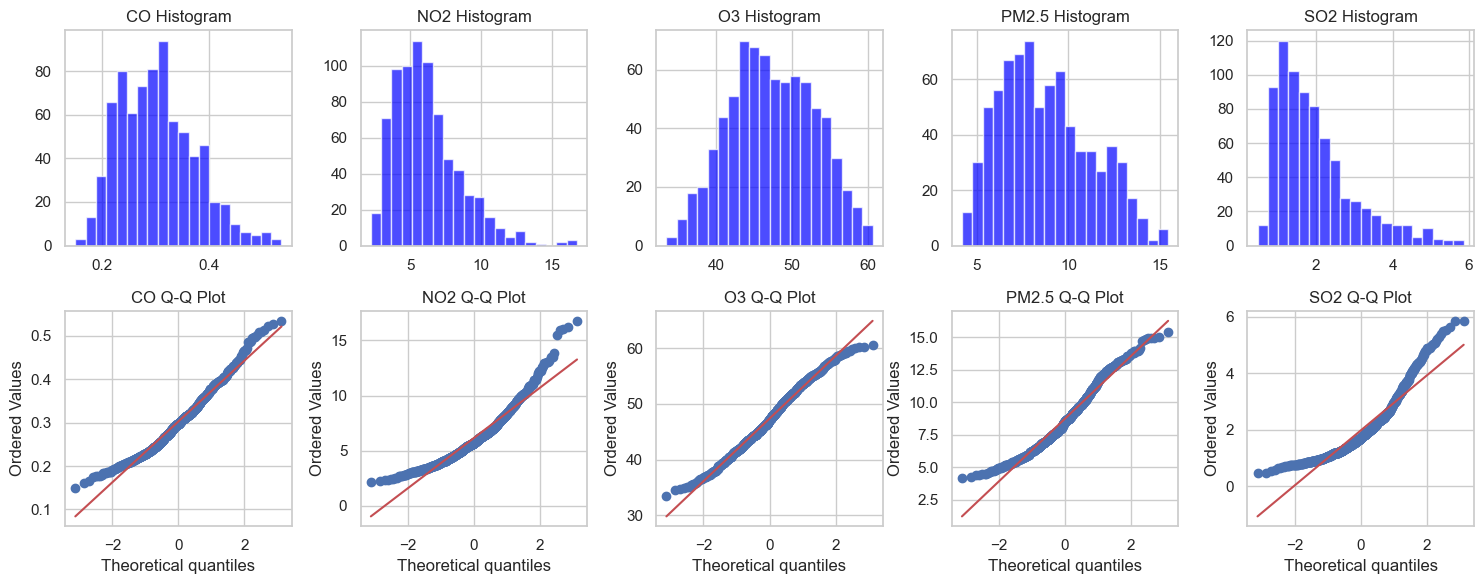

CO is not normally distributed (p-value: 5.951934990478106e-08)
NO2 is not normally distributed (p-value: 6.1438812558705206e-33)
O3 is not normally distributed (p-value: 1.5971914660976792e-08)
PM2.5 is not normally distributed (p-value: 1.0107494481868678e-11)
SO2 is not normally distributed (p-value: 4.7126602030509246e-35)


In [134]:
#Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df['CO']
no2 = df['NO2']
o3 = df['O3']
pm25 = df['PM2.5']
so2 = df['SO2']

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ['CO', 'NO2', 'O3', 'PM2.5', 'SO2']

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color='blue', alpha=0.7)
    axes[0, i].set_title(f'{var_names[i]} Histogram')
    
    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'{var_names[i]} Q-Q Plot')

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f'{variable_name} is not normally distributed (p-value: {p_value})')
    else:
        print(f'{variable_name} is normally distributed (p-value: {p_value})')


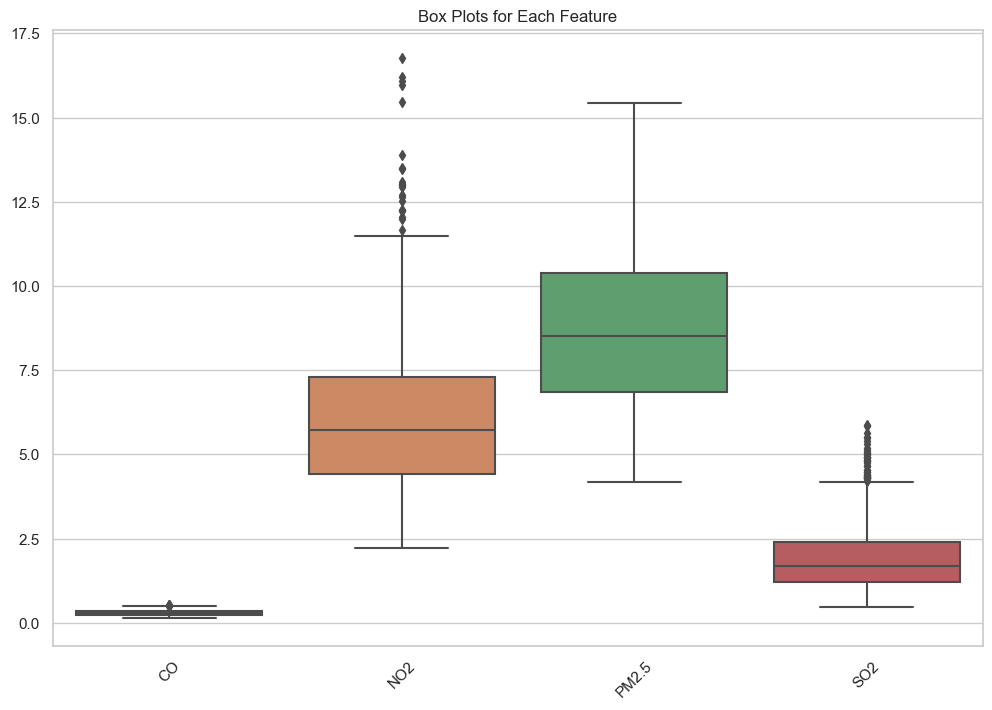

In [135]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(12, 8))  # Set the figure size
sn.boxplot(data=df[['CO', 'NO2', 'PM2.5', 'SO2']])
plt.title('Box Plots for Each Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [136]:
import numpy as np
df['CO'] = np.log(df['CO'])
df['NO2'] = np.log(df['NO2'])
df['PM2.5'] = np.log(df['PM2.5'])
df['SO2'] = np.log(df['SO2'])
df['O3'] = np.log(df['O3'])

In [137]:
df.head()

,Year,State,CO,NO2,O3,PM2.5,SO2,Deaths
0,2000,Alabama,-1.125789,1.789021,4.053545,2.712347,1.179214,3064
1,2000,Arkansas,-1.114789,1.801690,3.987920,2.491300,1.050567,2027
2,2000,Arizona,-0.862121,2.294140,4.065297,2.001532,0.851465,2574
3,2000,California,-0.771340,2.375473,3.884360,2.388467,0.657964,14060
4,2000,Colorado,-0.957474,2.131779,4.091618,1.705032,0.920992,1463


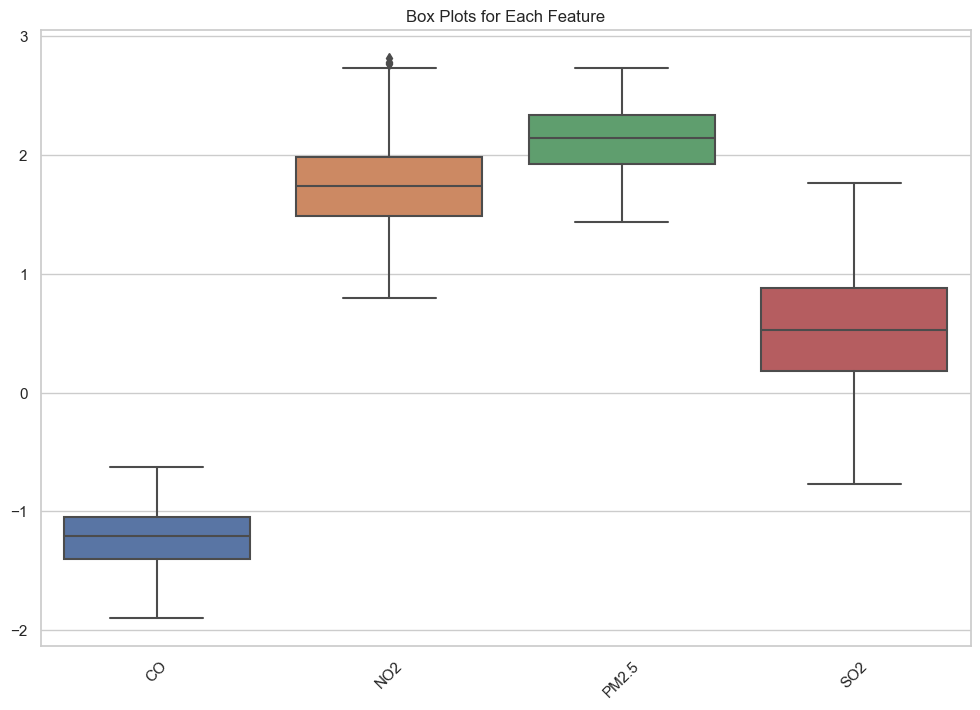

In [138]:
# Set the style of the plot (optional)
sn.set(style="whitegrid")

# Create a box plot for each relevant column
plt.figure(figsize=(12, 8))  # Set the figure size
sn.boxplot(data=df[['CO', 'NO2', 'PM2.5', 'SO2']])
plt.title('Box Plots for Each Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

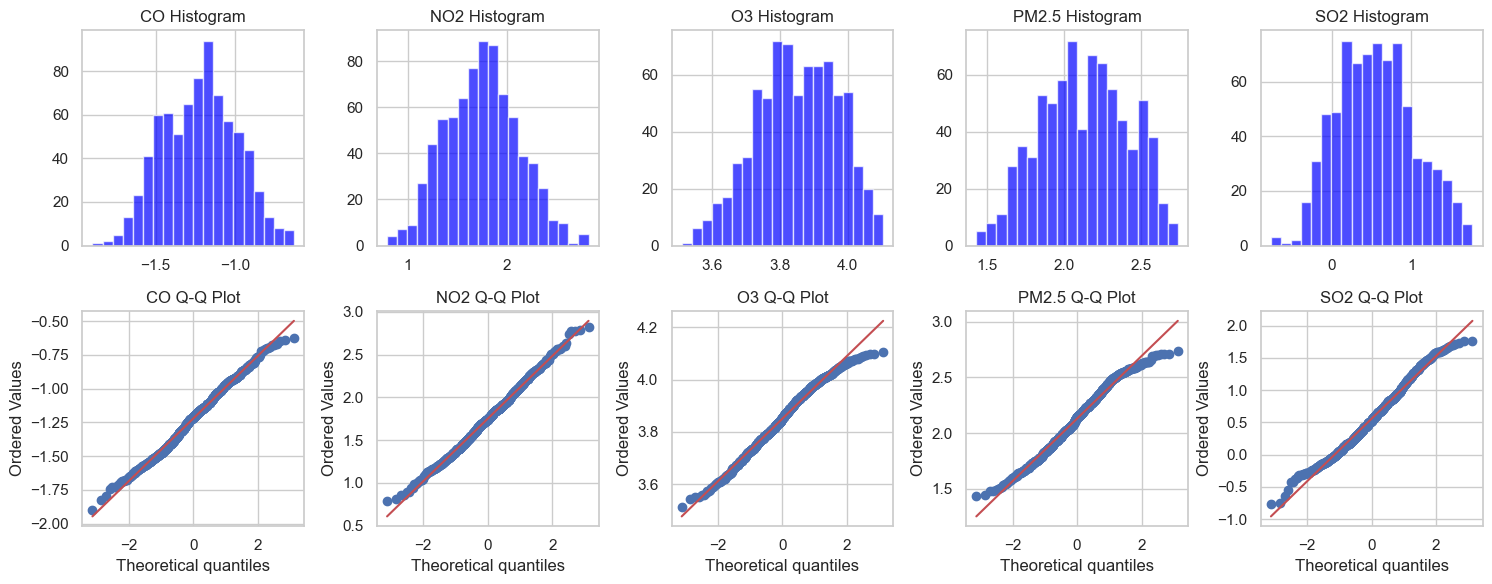

CO is not normally distributed (p-value: 0.00047520266698643134)
NO2 is normally distributed (p-value: 0.10736648371043549)
O3 is not normally distributed (p-value: 1.5847692783828248e-06)
PM2.5 is not normally distributed (p-value: 7.589604910910564e-13)
SO2 is not normally distributed (p-value: 6.406581433932922e-05)


In [139]:
#Univarite Analysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract the data for each variable
co = df['CO']
no2 = df['NO2']
o3 = df['O3']
pm25 = df['PM2.5']
so2 = df['SO2']

# Create a list of variable names for plotting and analysis
variables = [co, no2, o3, pm25, so2]
var_names = ['CO', 'NO2', 'O3', 'PM2.5', 'SO2']

# Set up subplots for the histograms and Q-Q plots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Loop through each variable for analysis
for i in range(len(variables)):
    # Histogram
    axes[0, i].hist(variables[i], bins=20, color='blue', alpha=0.7)
    axes[0, i].set_title(f'{var_names[i]} Histogram')
    
    # Q-Q Plot
    stats.probplot(variables[i], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f'{var_names[i]} Q-Q Plot')

plt.tight_layout()
plt.show()

# Perform normality tests
for i in range(len(variables)):
    variable_name = var_names[i]
    p_value = stats.normaltest(variables[i]).pvalue
    if p_value < 0.05:
        print(f'{variable_name} is not normally distributed (p-value: {p_value})')
    else:
        print(f'{variable_name} is normally distributed (p-value: {p_value})')


In [140]:
df.head()

,Year,State,CO,NO2,O3,PM2.5,SO2,Deaths
0,2000,Alabama,-1.125789,1.789021,4.053545,2.712347,1.179214,3064
1,2000,Arkansas,-1.114789,1.801690,3.987920,2.491300,1.050567,2027
2,2000,Arizona,-0.862121,2.294140,4.065297,2.001532,0.851465,2574
3,2000,California,-0.771340,2.375473,3.884360,2.388467,0.657964,14060
4,2000,Colorado,-0.957474,2.131779,4.091618,1.705032,0.920992,1463


In [141]:
# Select the independent variables (features)
independent_vars = ['CO', 'NO2', 'O3', 'PM2.5', 'SO2']

# Calculate VIF for each variable
X = df[independent_vars]
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

  Variable         VIF
0       CO   69.433945
1      NO2   71.527714
2       O3  225.607115
3    PM2.5  107.948836
4      SO2    8.740432


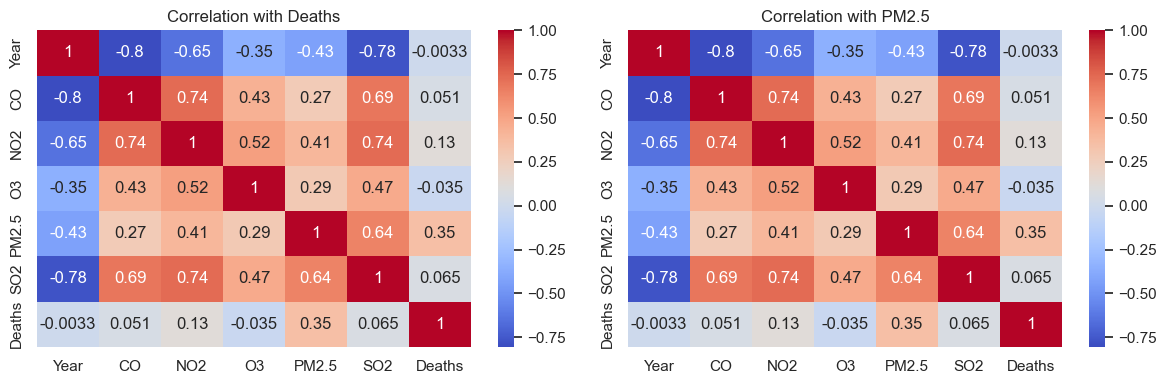

In [142]:




# Calculate the correlation matrix for 'Deaths' with all features
correlation_deaths = df.corrwith(df['Deaths'])

# Calculate the correlation matrix for 'PM2.5' with all features
correlation_pm25 = df.corrwith(df['PM2.5'])

# Create subplots for correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot correlation of 'Deaths' with other features
sn.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation with Deaths')

# Plot correlation of 'PM2.5' with other features
sn.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation with PM2.5')

plt.tight_layout()
plt.show()


In [143]:
df.describe()

,Year,CO,NO2,O3,PM2.5,SO2,Deaths
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2007.500000,-1.222191,1.750875,3.850776,2.129277,0.558673,3348.125000
std,4.612776,0.232027,0.365603,0.120198,0.282032,0.486954,3096.375005
min,2000.000000,-1.898053,0.792775,3.511661,1.433435,-0.768070,214.000000
25%,2003.750000,-1.403899,1.485860,3.769704,1.924191,0.182537,941.750000
50%,2007.500000,-1.212509,1.742710,3.853968,2.141992,0.528706,2549.000000
75%,2011.250000,-1.050085,1.988127,3.945537,2.341320,0.877825,4158.750000
max,2015.000000,-0.626962,2.819924,4.104284,2.736462,1.768070,14416.000000


In [144]:
print(data_scaled)

[[ 0.41574768  0.10440542  1.68805509  1.27516113]
 [ 0.46318834  0.13908091  1.1417244   1.01080089]
 [ 1.55285401  1.48691106  1.78589708  0.60166413]
 ...
 [-1.4696811  -1.18020025 -0.95627554 -1.08878474]
 [-0.89256826 -1.00037729 -0.5481029  -0.50775137]
 [-0.78495808 -1.20036247  0.3179804  -0.77573441]]


Explained Variance for PC1: 0.7039
Explained Variance for PC2: 0.1589
Explained Variance for PC3: 0.0770
Explained Variance for PC4: 0.0603


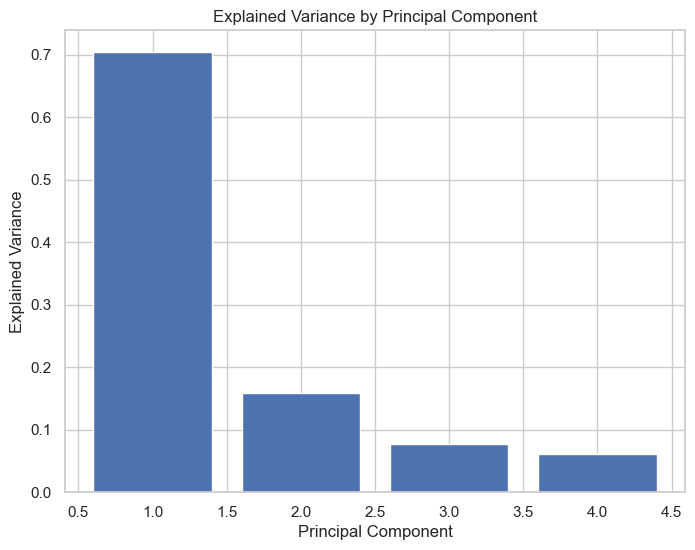

In [145]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the columns with numeric data for PCA
numeric_columns_scale = ['CO', 'NO2', 'O3', 'SO2']

# Standardize the data (mean=0, std=1) for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[numeric_columns_scale])
# Apply PCA
pca = PCA()

pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f'Explained Variance for PC{i+1}: {var:.4f}')
    
# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()




In [146]:
print(pca_result)

[[-1.63216567 -1.06625552  0.56302883 -0.73582978]
 [-1.31216212 -0.6157319   0.36630783 -0.56926563]
 [-2.6546092  -0.740455   -0.74242149  0.16515114]
 ...
 [ 2.35792416 -0.05214182  0.27043518  0.13072862]
 [ 1.4916743  -0.06484719  0.28380804 -0.2140483 ]
 [ 1.32671929 -0.9019347  -0.03039263 -0.43047724]]


In [147]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the first 3 principal components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Add the 'Year' and 'State' columns back if needed
pca_df['Year'] = df['Year']
pca_df['State'] = df['State']
pca_df['PM2.5'] = df['PM2.5']

# Print the DataFrame with the first 3 principal components
print(pca_df)



          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
763  3.360324  0.415647 -0.248117  2015        Vermont  1.686292
764  2.411874  0.244212 -0.509862  2015     Washington  1.827739
765  2.357924 -0.052142  0.270435  2015      Wisconsin  1.963984
766  1.491674 -0.064847  0.283808  2015  West Virginia  2.025579
767  1.326719 -0.901935 -0.030393  2015        Wyoming  1.512608

[768 rows x 6 columns]


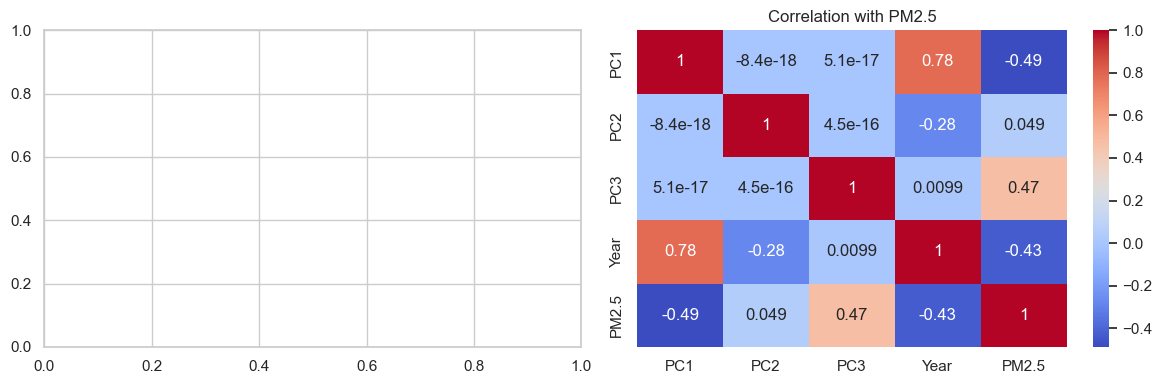

In [148]:


# Calculate the correlation matrix for 'PM2.5' with all features
correlation_pm25 = pca_df.corrwith(pca_df['PM2.5'])

# Create subplots for correlation matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


# Plot correlation of 'PM2.5' with other features
sn.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation with PM2.5')

plt.tight_layout()
plt.show()


In [149]:
print(pca_df)

          PC1       PC2       PC3  Year          State     PM2.5
0   -1.632166 -1.066256  0.563029  2000        Alabama  2.712347
1   -1.312162 -0.615732  0.366308  2000       Arkansas  2.491300
2   -2.654609 -0.740455 -0.742421  2000        Arizona  2.001532
3   -2.148175  0.685029 -1.218686  2000     California  2.388467
4   -2.367333 -1.103787 -0.360892  2000       Colorado  1.705032
..        ...       ...       ...   ...            ...       ...
763  3.360324  0.415647 -0.248117  2015        Vermont  1.686292
764  2.411874  0.244212 -0.509862  2015     Washington  1.827739
765  2.357924 -0.052142  0.270435  2015      Wisconsin  1.963984
766  1.491674 -0.064847  0.283808  2015  West Virginia  2.025579
767  1.326719 -0.901935 -0.030393  2015        Wyoming  1.512608

[768 rows x 6 columns]


In [150]:
from sklearn.preprocessing import LabelEncoder
# One-hot encode the 'State' column
data_encoded = pd.get_dummies(pca_df, columns=['State'], prefix=['State'])

# Convert the 'Year' column to a categorical variable
data_encoded['Year'] = data_encoded['Year'].astype('category')

# Label encode the 'Year' column
label_encoder = LabelEncoder()
data_encoded['Year'] = label_encoder.fit_transform(data_encoded['Year'])

# Display the preprocessed data
print(data_encoded)

          PC1       PC2       PC3  Year     PM2.5  State_Alabama  \
0   -1.632166 -1.066256  0.563029     0  2.712347              1   
1   -1.312162 -0.615732  0.366308     0  2.491300              0   
2   -2.654609 -0.740455 -0.742421     0  2.001532              0   
3   -2.148175  0.685029 -1.218686     0  2.388467              0   
4   -2.367333 -1.103787 -0.360892     0  1.705032              0   
..        ...       ...       ...   ...       ...            ...   
763  3.360324  0.415647 -0.248117    15  1.686292              0   
764  2.411874  0.244212 -0.509862    15  1.827739              0   
765  2.357924 -0.052142  0.270435    15  1.963984              0   
766  1.491674 -0.064847  0.283808    15  2.025579              0   
767  1.326719 -0.901935 -0.030393    15  1.512608              0   

     State_Arizona  State_Arkansas  State_California  State_Colorado  ...  \
0                0               0                 0               0  ...   
1                0           

## Model Building

In [151]:
y = data_encoded['PM2.5']
x = data_encoded
x.drop('PM2.5',axis = 1, inplace = True)

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
pred= lr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.9441006166195983
Mean absolute error =  0.05213763972236824
Mean Squared error =  0.004332599226119031
Root Mean Sqaured Error=  0.06582248267969715


In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
cv_score = cross_val_score(lr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.9123792166995391

In [156]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred= dtr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.656567734066292
Mean absolute error =  0.11493701825542775
Mean Squared error =  0.02661843976852107
Root Mean Sqaured Error=  0.1631515852467302


In [157]:
cv_score = cross_val_score(dtr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.30367869754483506

In [158]:
from sklearn.ensemble import RandomForestRegressor
  
rfr = RandomForestRegressor(n_estimators = 100, random_state = 12)
rfr.fit(X_train, y_train) 
pred= rfr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8411535832073357
Mean absolute error =  0.08187798466559972
Mean Squared error =  0.012311725476187778
Root Mean Sqaured Error=  0.11095821500090823


In [159]:
cv_score = cross_val_score(rfr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.6194251187844066

In [160]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.1,random_state= 0)
lasso.fit(X_train, y_train) 
pred= lasso.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.20106908170861904
Mean absolute error =  0.21213693833154618
Mean Squared error =  0.06192282041389011
Root Mean Sqaured Error=  0.24884296336020859


In [161]:
cv_score = cross_val_score(lasso,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

-0.055658709362409596

In [162]:
 from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train) 
pred= knr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.7307589069845999
Mean absolute error =  0.10313556739541847
Mean Squared error =  0.020868096939454708
Root Mean Sqaured Error=  0.14445794176664262


In [163]:
cv_score = cross_val_score(knr,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean

0.32228921929688986

In [164]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.001,random_state= 0)
ridge.fit(X_train, y_train) 
pred= ridge.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.9441039833763912
Mean absolute error =  0.05213974092229679
Mean Squared error =  0.00433233827855587
Root Mean Sqaured Error=  0.06582050044291574


In [165]:
cv_score = cross_val_score(ridge,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.8921247506961457

Cosidering the difference between R2 score and cv mean score we get minimum difference with the Linear Regression model.
So we will consider that as the best model.

<b>Hyper parameter Tuning<b>

In [166]:
from sklearn.model_selection import GridSearchCV

In [173]:
parameter = { 'fit_intercept' : [True,False],
               'n_jobs' : [42,-1,-10,1,10,100,200,500,35,25]
             }


In [174]:
GCV = GridSearchCV(LinearRegression(),parameter,cv =5)

In [175]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [42, -1, -10, 1, 10, 100, 200, 500, 35, 25]})

In [176]:
GCV.best_params_

{'fit_intercept': False, 'n_jobs': 42}

In [178]:
Final_mod = LinearRegression(fit_intercept=False,n_jobs=42)
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
cv_score = cross_val_score(Final_mod,x,y,cv=5)
cv_mean = cv_score.mean()
print(r2,cv_mean)

0.944098891747135 0.9123792166995205


## Serialization

In [179]:
#Saving the model
import joblib
joblib.dump(Final_mod,"PM2.5predictor.pkl")

['PM2.5predictor.pkl']